## Linear Discriminants

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


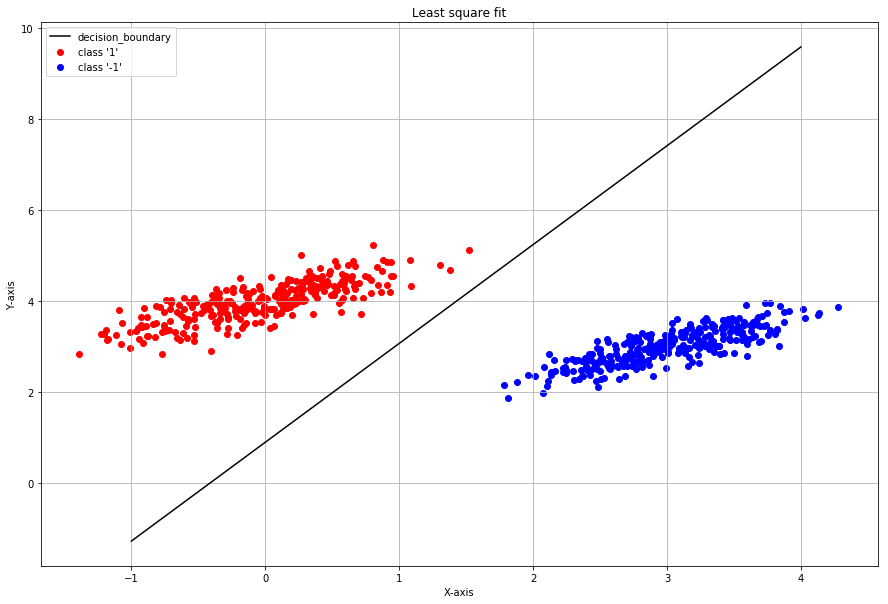

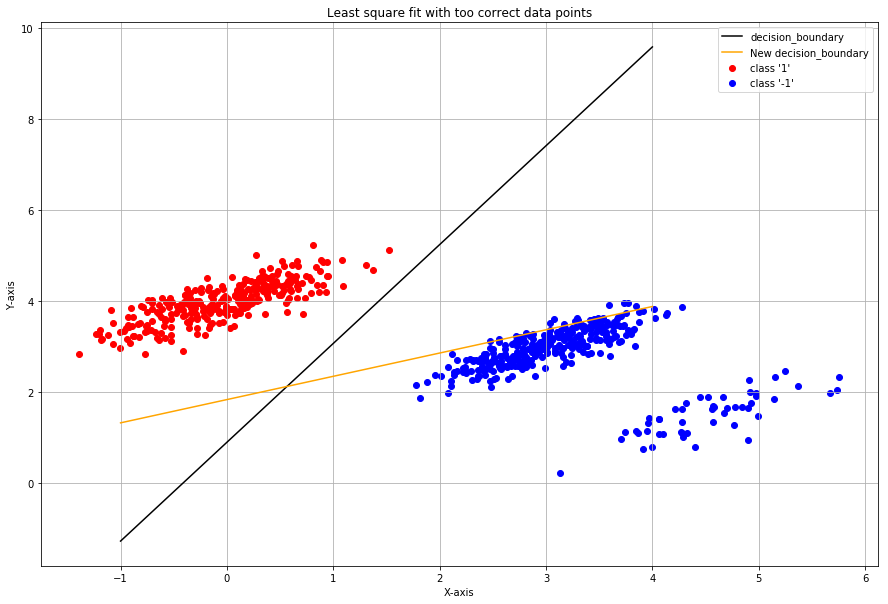

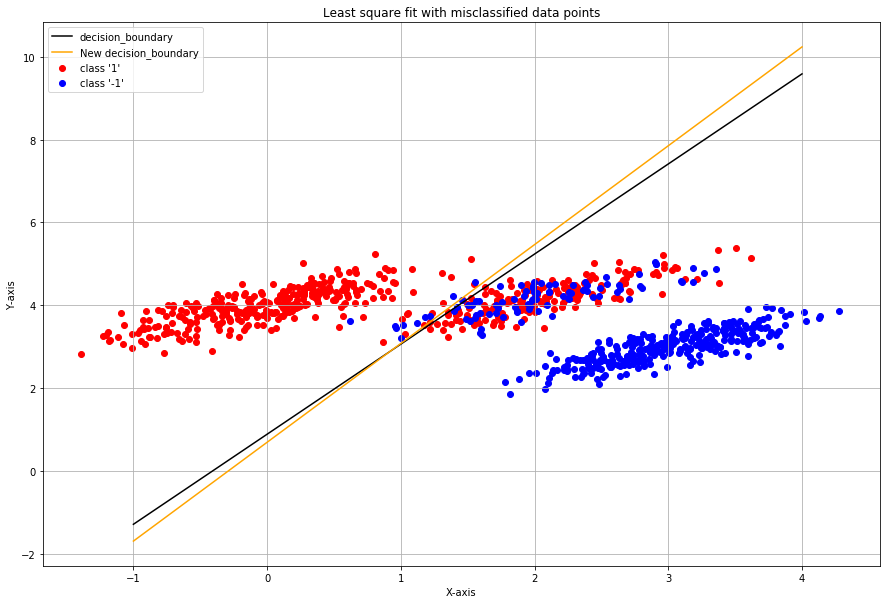

In [2]:
#Function to plot a boundary line
def plot_decision_boundary(line_x, line_y, label, title, color="k"):
    
    
    plt.plot(line_x,line_y, c=color, label=label)
    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.grid()
    plt.show()
    


#Function to classify binary class using least square fit
def decision_boundary(data1, data2):
    
    data1_label = np.hstack((np.ones(len(data1))[np.newaxis].T,-1*np.ones(len(data1))[np.newaxis].T))
    data2_label = np.hstack((-1*np.ones(len(data2))[np.newaxis].T,np.ones(len(data2))[np.newaxis].T))
    
    #stacking data as matrix adding bias and stacking label
    X = np.vstack((data1,data2)) 
    X=np.array([np.ones(len(X)), X[:,0], X[:,1]]).T    
    T = np.vstack((data1_label,data2_label))   
    #calculating weight and intercept
    W = np.linalg.pinv(X).dot(T)
#     print(W)
    line_x = np.linspace(-1,4)    
    slope = -W[0][0]/W[2][0]
    intercept = -(W[1][0]/W[2][0])    
    line_y = (slope*line_x)+intercept
    return line_x,line_y


#creating 300 samples from given mean and classifying
N=300
mean1 = [0, 4]
mean2 = [3, 3]
cov = [[0.3, 0.2], [0.2, 0.2]]
data1 = np.random.multivariate_normal(mean1, cov, N)
data2 = np.random.multivariate_normal(mean2, cov, N)
plt.figure(figsize=(15,10))
plt.scatter(data1[:,0],data1[:,1],c="r", label = "class '1'")
plt.scatter(data2[:,0],data2[:,1],c="b", label = "class '-1'")
line_x1, line_y1 = decision_boundary(data1, data2)
plot_decision_boundary(line_x1, line_y1, "decision_boundary", "Least square fit")

#Creating outliers in the class "-1" little down to the exisitng points
mean3 = [mean2[0]+1.5, mean2[0]-1.5]
data3 = np.random.multivariate_normal(mean3, cov, 50)
data3 = np.vstack((data3,data2))
plt.figure(figsize=(15,10))
plt.scatter(data1[:,0],data1[:,1],c="r", label = "class '1'")
plt.scatter(data3[:,0],data3[:,1],c="b", label = "class '-1'")
line_x2, line_y2 = decision_boundary(data1, data3)
plt.plot(line_x1, line_y1, c="k", label="decision_boundary")
plot_decision_boundary(line_x2, line_y2, "New decision_boundary",\
                       "Least square fit with too correct data points", "orange")

#Creating outliers more or less at the mid of both the classes
#which are considered to be missclassified between two classes
mean4 = [(line_x1[0]+line_x1[-1])/1.5, (line_y1[0]+line_y1[-1])/2]
data4 = np.random.multivariate_normal(mean4, cov, 275)
half = int(data4.shape[0]/3)
data5 = np.vstack((data4[half:,:],data1))
data6 = np.vstack((data4[:half,:],data2))
plt.figure(figsize=(15,10))
plt.scatter(data5[:,0],data5[:,1],c="r", label = "class '1'")
plt.scatter(data6[:,0],data6[:,1],c="b", label = "class '-1'")
line_x3,line_y3 = decision_boundary(data5,data6)
plt.plot(line_x1, line_y1, c="k", label="decision_boundary")
plot_decision_boundary(line_x3, line_y3, "New decision_boundary",\
                       "Least square fit with misclassified data points", "orange")


In [3]:
#Logistic regression for diagnosis data

data = pd.read_csv("diagnosis.csv")
X = np.array(data.iloc[:,2:-2], dtype="float64")
#pre-processing - normalization of data
X =(X-np.mean(X,axis=0))/np.std(X,axis=0)
y = np.array(data["diagnosis"]).T
y = np.where(y=="M", 0, y)
y = np.where(y=="B", 1, y).astype(np.int)
data.head(5)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
def logistic_sigmoid(a):
    return 1/(1+np.exp(-a))

def error_function(t, y):
    return -np.sum((t * np.log(y)) + ((1-t) * np.log(1-y)))

def add_bias(X):
    bias = np.ones((X.shape[0],1))
    return np.hstack((bias, X))

def predict(X, W):
    
    a = X.dot(W)
    prob = logistic_sigmoid(a.astype(np.float)) 
    return prob.round()

def logistic_regression(X, t, num_iter, learning_rate):
    
    pi_X = add_bias(X)
    
    W = np.zeros(pi_X.shape[1])
    
    for i in range(num_iter):
        a = pi_X.dot(W)
        y = logistic_sigmoid(a.astype(np.float))
       
        gradient = (y-t).dot(pi_X) 
        
        W = W - (learning_rate * gradient)
        
        a = pi_X.dot(W)
        y = logistic_sigmoid(a.astype(np.float))
        
        error = error_function(t, y)
        if(i%1000 == 0):
            print("\nError at {} epoch is {:.2f}".format(i, error))
      
    return predict(pi_X, W), W

def call_my_logistic_regression(X, y):
    #Splitting data using sklearn library
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
    pred, trained_weight= logistic_regression(X_train, y_train, 3500, 0.005)
    pred = predict(add_bias(X_test), trained_weight)
    print("\n classification report for 25% of data")
    print(metrics.classification_report(y_test, pred))
    cnf_matrix = metrics.confusion_matrix(y_test, pred)
    print("\n confusion matrix for 25% of data")
    print(cnf_matrix)
    acc = metrics.accuracy_score(y_test, pred)

    pred,_= logistic_regression(X, y, 3000, 0.0005)

    print("\n classification report for all data")
    print(metrics.classification_report(y, pred))
    cnf_matrix = metrics.confusion_matrix(y, pred)
    print("\n confusion matrix for all data")
    print(cnf_matrix)
    return acc
   
my_accuracy = call_my_logistic_regression(X, y)


Error at 0 epoch is 76.13

Error at 1000 epoch is 14.62

Error at 2000 epoch is 12.85

Error at 3000 epoch is 11.89

 classification report for 25% of data
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        53
           1       0.98      0.96      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143


 confusion matrix for 25% of data
[[51  2]
 [ 4 86]]

Error at 0 epoch is 192.41

Error at 1000 epoch is 30.03

Error at 2000 epoch is 27.99

 classification report for all data
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       212
           1       0.99      1.00      0.99       357

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569


 confusio

In [5]:
# Existing library code from sklearn

def call_sklearn_logistic_regression(X, y):
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
    
    # instantiate the model (using the default parameters)
    logreg = LogisticRegression()

    # fit the model with data
    logreg.fit(X_train,y_train)

    # predict the label
    y_pred=logreg.predict(X_test)
    print("\n classification report for 25% of data by sklearn")
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(metrics.classification_report(y_test, y_pred))
    print("\n confusion matrix for 25% data by sklearn")
    print(cnf_matrix)
    acc = metrics.accuracy_score(y_test, y_pred)
    return acc
    
sklearn_accuracy = call_sklearn_logistic_regression(X,y)

if my_accuracy>sklearn_accuracy:
    print("\nSelf created logistic regression gives more accuracy than sklearn")
elif sklearn_accuracy>my_accuracy:
    print("\nSklearn logistic regression gives more accuracy than Self created")
else:
    print("\nBoth logistic regression gives same accuracy")


 classification report for 25% of data by sklearn
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        53
           1       0.96      0.97      0.96        90

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143


 confusion matrix for 25% data by sklearn
[[49  4]
 [ 3 87]]

Self created logistic regression gives more accuracy than sklearn


In [6]:
#Logistic regression for Purschased data

data = pd.read_csv("purchased.csv")
#pre-processing - normalization of data
data['Gender'] = data['Gender'].map({'Male':0,'Female':1})
Xp = np.array(data.iloc[:,1:-1], dtype="float64")
#pre-processing - normalization of data
Xp =(Xp-np.mean(Xp,axis=0))/np.std(Xp,axis=0)
yp = np.array(data["Purchased"]).T


my_accuracy = call_my_logistic_regression(Xp, yp)
sklearn_accuracy = call_sklearn_logistic_regression(Xp,yp)

if my_accuracy>sklearn_accuracy:
    print("\nSelf created logistic regression gives more accuracy than sklearn")
elif sklearn_accuracy>my_accuracy:
    print("\nSklearn logistic regression gives more accuracy than Self created")
else:
    print("\nBoth logistic regression gives same accuracy")


Error at 0 epoch is 163.57

Error at 1000 epoch is 111.36

Error at 2000 epoch is 111.36

Error at 3000 epoch is 111.36

 classification report for 25% of data
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        68
           1       0.90      0.81      0.85        32

    accuracy                           0.91       100
   macro avg       0.91      0.88      0.89       100
weighted avg       0.91      0.91      0.91       100


 confusion matrix for 25% of data
[[65  3]
 [ 6 26]]

Error at 0 epoch is 266.39

Error at 1000 epoch is 137.92

Error at 2000 epoch is 137.92

 classification report for all data
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       257
           1       0.84      0.73      0.78       143

    accuracy                           0.85       400
   macro avg       0.85      0.82      0.83       400
weighted avg       0.85      0.85      0.85       400


 co

In [7]:
#Logistic regression for advertising data
data = pd.read_csv("advertising.csv")
seconds = [0]

#Timestamp coversion to seconds
for i in range(1,len(data)):
    a = pd.Timestamp(data["Timestamp"][i])-pd.Timestamp(data["Timestamp"][0])
    seconds.append(a/np.timedelta64(1,'s'))
    
data["Timestamp"] = seconds
#Dropping non-integer column
data = data.drop(columns=['Ad Topic Line','Country', 'City'])
Xa = np.array(data.iloc[:,1:-1], dtype="float64")
#pre-processing - normalization of data
Xa =(Xa-np.mean(Xa,axis=0))/np.std(Xa,axis=0)
ya = np.array(data["Clicked on Ad"]).T

my_accuracy = call_my_logistic_regression(Xa, ya)
sklearn_accuracy = call_sklearn_logistic_regression(Xa,ya)

if my_accuracy>sklearn_accuracy:
    print("\nSelf created logistic regression gives more accuracy than sklearn")
elif sklearn_accuracy>my_accuracy:
    print("\nSklearn logistic regression gives more accuracy than Self created")
else:
    print("\nBoth logistic regression gives same accuracy")



Error at 0 epoch is 187.22

Error at 1000 epoch is 152.46

Error at 2000 epoch is 152.46

Error at 3000 epoch is 152.46

 classification report for 25% of data
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       136
           1       0.93      0.96      0.94       114

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250


 confusion matrix for 25% of data
[[128   8]
 [  5 109]]

Error at 0 epoch is 570.23

Error at 1000 epoch is 195.30

Error at 2000 epoch is 195.30

 classification report for all data
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       500
           1       0.94      0.92      0.93       500

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



**Overall the accuracy of the self created logistic regression is equal or greater than the accuracy of sklearn**<br>
**If we trian the model and then test it gives more acccuracy than running all the data**